
--- Personal Scheduling Assistant ---
1. Add Task
2. View Upcoming Tasks
3. Schedule Tasks
4. Analyze Task Density
5. Search Task by Deadline
6. Exit
Enter your tasks. Type 'done' when finished.
Task 'finish research paper' added.

Task 'Buy groceries' added.

Task 'review lecture notes' added.

Task 'watch movie' added.

Task '2' added.


--- Personal Scheduling Assistant ---
1. Add Task
2. View Upcoming Tasks
3. Schedule Tasks
4. Analyze Task Density
5. Search Task by Deadline
6. Exit

Upcoming Tasks:
finish research paper (academic) - Priority: 1, Due: 2024-12-05 23:59, Duration: 180 min
Buy groceries (personal) - Priority: 2, Due: 2024-12-07 18:00, Duration: 60 min
review lecture notes (academic) - Priority: 3, Due: 2024-12-10 20:00, Duration: 90 min
watch movie (personal) - Priority: 4, Due: 2024-12-12 22:00, Duration: 120 min
2 (personal) - Priority: 5, Due: 2024-12-13 17:00, Duration: 60 min

--- Personal Scheduling Assistant ---
1. Add Task
2. View Upcoming Tasks
3. Schedule T

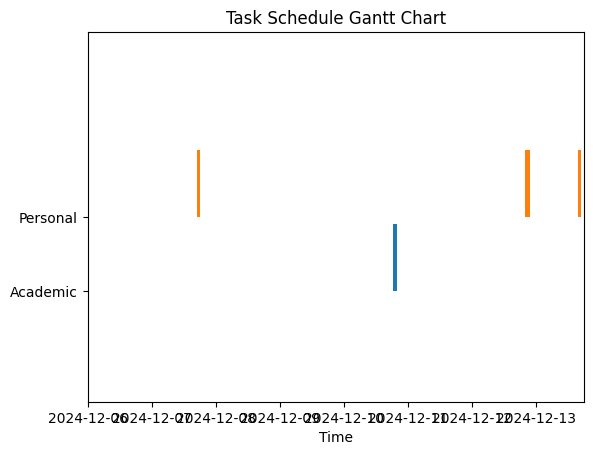


--- Personal Scheduling Assistant ---
1. Add Task
2. View Upcoming Tasks
3. Schedule Tasks
4. Analyze Task Density
5. Search Task by Deadline
6. Exit

Task Density Analysis:
2024-12-05 23:59: 1 tasks
2024-12-06 00:59: 0 tasks
2024-12-06 01:59: 0 tasks
2024-12-06 02:59: 0 tasks
2024-12-06 03:59: 0 tasks
2024-12-06 04:59: 0 tasks
2024-12-06 05:59: 0 tasks
2024-12-06 06:59: 0 tasks
2024-12-06 07:59: 0 tasks
2024-12-06 08:59: 0 tasks
2024-12-06 09:59: 0 tasks
2024-12-06 10:59: 0 tasks
2024-12-06 11:59: 0 tasks
2024-12-06 12:59: 0 tasks
2024-12-06 13:59: 0 tasks
2024-12-06 14:59: 0 tasks
2024-12-06 15:59: 0 tasks
2024-12-06 16:59: 0 tasks
2024-12-06 17:59: 0 tasks
2024-12-06 18:59: 0 tasks
2024-12-06 19:59: 0 tasks
2024-12-06 20:59: 0 tasks
2024-12-06 21:59: 0 tasks
2024-12-06 22:59: 0 tasks
2024-12-06 23:59: 0 tasks
2024-12-07 00:59: 0 tasks
2024-12-07 01:59: 0 tasks
2024-12-07 02:59: 0 tasks
2024-12-07 03:59: 0 tasks
2024-12-07 04:59: 0 tasks
2024-12-07 05:59: 0 tasks
2024-12-07 06:59: 0

In [8]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Task class definition
class Task:
    def __init__(self, name, task_type, deadline, priority, duration):
        self.name = name
        self.task_type = task_type  # "personal" or "academic"
        self.deadline = deadline  # datetime object
        self.priority = priority  # Integer priority level
        self.duration = duration  # Duration in minutes

    def __repr__(self):
        return f"{self.name} ({self.task_type}) - Priority: {self.priority}, Due: {self.deadline.strftime('%Y-%m-%d %H:%M')}, Duration: {self.duration} min"

# TaskManager class with scheduling and retrieval methods
class TaskManager:
    def __init__(self):
        self.tasks = []  # Min-heap for priority-based task sorting
        self.schedule = []  # List of scheduled tasks

    def add_task(self, task):
        self.tasks.append([task.priority, task.deadline, task])

    def get_upcoming_tasks(self):
        """Retrieve tasks sorted by deadline."""
        return [task for _, _, task in sorted(self.tasks, key=lambda x: x[1])]

    def schedule_tasks(self):
        """Uses dynamic programming to find optimal task order within the given time constraints."""
        current_time = datetime.now()
        scheduled_tasks = []
        
        for priority, deadline, task in sorted(self.tasks, key=lambda x: (x[0], x[1])):
            if current_time + timedelta(minutes=task.duration) <= deadline:
                scheduled_tasks.append(task)
                current_time += timedelta(minutes=task.duration)
        
        self.schedule = scheduled_tasks
        return self.schedule

# Merge sort for sorting tasks by a given attribute
def merge_sort(tasks, key):
    if len(tasks) <= 1:
        return tasks
    mid = len(tasks) // 2
    left = merge_sort(tasks[:mid], key)
    right = merge_sort(tasks[mid:], key)
    return merge(left, right, key)

def merge(left, right, key):
    sorted_tasks = []
    while left and right:
        if getattr(left[0], key) <= getattr(right[0], key):
            sorted_tasks.append(left.pop(0))
        else:
            sorted_tasks.append(right.pop(0))
    sorted_tasks.extend(left if left else right)
    return sorted_tasks

# Binary search for finding tasks by deadline
def binary_search(tasks, target_deadline):
    """Binary search for finding tasks with a specific deadline or closest deadline."""
    tasks = sorted(tasks, key=lambda x: x.deadline)  # Ensure tasks are sorted by deadline
    low, high = 0, len(tasks) - 1
    while low <= high:
        mid = (low + high) // 2
        if tasks[mid].deadline == target_deadline:
            return tasks[mid]
        elif tasks[mid].deadline < target_deadline:
            low = mid + 1
        else:
            high = mid - 1
    return tasks[low] if low < len(tasks) else None

# Task density analysis
def analyze_task_density(tasks, interval_minutes=60):
    """Analyze time intervals to see where task density is highest."""
    intervals = {}
    start_time = min(task.deadline for task in tasks)
    end_time = max(task.deadline for task in tasks)
    interval = timedelta(minutes=interval_minutes)
    
    while start_time <= end_time:
        count = sum(1 for task in tasks if start_time <= task.deadline < start_time + interval)
        intervals[start_time.strftime('%Y-%m-%d %H:%M')] = count
        start_time += interval
    
    return intervals

# Gantt chart visualization for tasks
def plot_gantt_chart(tasks):
    fig, gnt = plt.subplots()
    gnt.set_ylim(0, 50)
    gnt.set_xlim(min(task.deadline for task in tasks), max(task.deadline for task in tasks) + timedelta(minutes=60))
    gnt.set_yticks([15, 25])
    gnt.set_yticklabels(['Academic', 'Personal'])
    gnt.set_xlabel('Time')
    gnt.set_title('Task Schedule Gantt Chart')
    
    for task in tasks:
        start = task.deadline - timedelta(minutes=task.duration)
        gnt.broken_barh([(start, timedelta(minutes=task.duration))], (15 if task.task_type == "academic" else 25, 9),
                        facecolors=('tab:blue' if task.task_type == "academic" else 'tab:orange'))
    
    plt.show()

# Function to prompt the user to input tasks
def get_user_input(manager):
    print("Enter your tasks. Type 'done' when finished.")
    
    while True:
        name = input("Task name (or type 'done' to finish): ")
        if name.lower() == 'done':
            break

        task_type = input("Task type (academic/personal): ").strip().lower()
        while task_type not in ['academic', 'personal']:
            task_type = input("Please enter a valid task type (academic/personal): ").strip().lower()

        # Deadline input with error handling
        while True:
            deadline_str = input("Deadline (YYYY-MM-DD HH:MM): ")
            try:
                deadline = datetime.strptime(deadline_str, '%Y-%m-%d %H:%M')
                break
            except ValueError:
                print("Invalid format. Please enter the deadline in the format YYYY-MM-DD HH:MM")

        priority = int(input("Priority (1 for highest priority): "))
        duration = int(input("Duration in minutes: "))

        # Create a task object and add it to the manager
        task = Task(name, task_type, deadline, priority, duration)
        manager.add_task(task)
        print(f"Task '{name}' added.\n")

# Menu function for user interaction
def display_menu(manager):
    while True:
        print("\n--- Personal Scheduling Assistant ---")
        print("1. Add Task")
        print("2. View Upcoming Tasks")
        print("3. Schedule Tasks")
        print("4. Analyze Task Density")
        print("5. Search Task by Deadline")
        print("6. Exit")
        
        choice = input("Enter your choice (1-6): ")

        if choice == '1':
            get_user_input(manager)
        elif choice == '2':
            upcoming_tasks = manager.get_upcoming_tasks()
            print("\nUpcoming Tasks:")
            for task in upcoming_tasks:
                print(task)
        elif choice == '3':
            scheduled_tasks = manager.schedule_tasks()
            print("\nScheduled Tasks:")
            for task in scheduled_tasks:
                print(task)
            plot_gantt_chart(scheduled_tasks)
        elif choice == '4':
            density_analysis = analyze_task_density(manager.schedule)
            print("\nTask Density Analysis:")
            for time_slot, count in density_analysis.items():
                print(f"{time_slot}: {count} tasks")
        elif choice == '5':
            # Search task by deadline
            if not manager.tasks:
                print("No tasks available to search.")
                continue
            
            deadline_str = input("Enter the deadline to search for (YYYY-MM-DD HH:MM): ")
            try:
                target_deadline = datetime.strptime(deadline_str, '%Y-%m-%d %H:%M')
            except ValueError:
                print("Invalid format. Please enter the deadline in the format YYYY-MM-DD HH:MM")
                continue
            
            tasks = [task[2] for task in manager.tasks]
            found_task = binary_search(tasks, target_deadline)
            
            if found_task:
                print(f"Task found: {found_task}")
            else:
                print("No task found with the specified deadline.")
        elif choice == '6':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please select a valid option.")

# Main function to run the scheduling assistant
def main():
    manager = TaskManager()
    display_menu(manager)

# Run the main function
if __name__ == "__main__":
    main()
